In [1]:
from ydata_profiling import ProfileReport


c:\Users\Felipe Nunez\Documents\Maestria\Ciencia de Datos\Taller 1\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import chi2_contingency

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

# 0. Carga de datos

In [4]:
data = pd.read_csv('data/hotel_bookings_modified.csv')

C:\Users\Felipe Nunez\AppData\Local\Temp\ipykernel_30676\3340524304.py:1: DtypeWarning: Columns (24) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('data/hotel_bookings_modified.csv')


In [5]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,kids
0,Resort Hotel,0,342,2015.0,July,27,1,0,0,2,...,NaN,NaN,0.0,Transient,0.0,0.0,0.0,Check-Out,2015-07-01,NaN
1,Resort Hotel,0,737,2015.0,July,27,1,0,0,2,...,NaN,NaN,0.0,Transient,0.0,0.0,0.0,Check-Out,2015-07-01,NaN
2,Resort Hotel,0,7,2015.0,July,27,1,0,1,1,...,NaN,NaN,0.0,Transient,75.0,0.0,0.0,Check-Out,2015-07-02,NaN
3,Resort Hotel,0,13,2015.0,July,27,1,0,1,1,...,304.0,NaN,0.0,Transient,75.0,0.0,0.0,Check-Out,2015-07-02,NaN
4,Resort Hotel,0,14,2015.0,July,27,1,0,2,2,...,240.0,NaN,0.0,Transient,98.0,0.0,1.0,Check-Out,2015-07-03,NaN


In [6]:
data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,kids
count,58895.000000,58895.000000,58307.000000,58895.000000,58895.000000,58895.000000,58895.000000,58895.000000,58891.000000,58895.000000,58895.000000,58895.000000,58895.000000,58895.000000,49763.000000,58894.000000,58894.000000,58306.000000,58894.000000,201.000000
mean,0.411393,100.050904,2205.522939,27.837389,15.766432,1.058154,2.847576,1.969148,0.112937,0.136599,0.030189,0.069191,0.099618,0.243009,146.983080,3.525979,96.250426,0.096697,0.512225,34.417910
std,0.492090,101.162420,1837.392466,13.346053,8.783036,1.093032,2.235486,2.943454,0.419710,3.115889,0.171109,1.102138,0.829166,0.695205,120.114987,21.841676,58.555599,0.300382,0.768378,38.571032
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-6.380000,0.000000,0.000000,-1.000000
25%,0.000000,17.000000,2016.000000,17.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,60.000000,0.000000,0.000000,-1.000000
50%,0.000000,69.000000,2016.000000,29.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,196.000000,0.000000,84.000000,0.000000,0.000000,-1.000000
75%,1.000000,157.000000,2016.000000,38.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,240.000000,0.000000,120.000000,0.000000,1.000000,65.000000
max,1.000000,737.000000,20016.000000,53.000000,31.000000,19.000000,50.000000,100.000000,10.000000,100.000000,1.000000,26.000000,30.000000,20.000000,535.000000,391.000000,5400.000000,8.000000,5.000000,100.000000


In [7]:
report = ProfileReport(data)
report.to_file('report.html')

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 24.10it/s]


# 1. Entendimiento inicial de datos:

In [8]:
data['company'].unique()


array([nan, 110.0, 113.0, 270.0, 178.0, 240.0, 154.0, 144.0, 307.0, 268.0,
       59.0, 204.0, 312.0, 318.0, 94.0, 174.0, 274.0, 195.0, 223.0, 317.0,
       281.0, 118.0, 53.0, 286.0, 12.0, 47.0, 324.0, 342.0, 373.0, 371.0,
       383.0, 86.0, 82.0, 218.0, 88.0, 31.0, 397.0, 392.0, 405.0, 331.0,
       367.0, 20.0, 83.0, 416.0, 51.0, 395.0, 102.0, 34.0, 84.0, 360.0,
       394.0, 457.0, 382.0, 461.0, 478.0, 386.0, 112.0, 486.0, 421.0, 9.0,
       308.0, 135.0, 224.0, 504.0, 269.0, 356.0, 498.0, 390.0, 513.0,
       203.0, 263.0, 477.0, 521.0, 169.0, 515.0, 445.0, 337.0, 251.0,
       428.0, 292.0, 388.0, 130.0, 250.0, 355.0, 254.0, 543.0, 531.0,
       528.0, 62.0, 120.0, 42.0, 81.0, 116.0, 530.0, 103.0, 39.0, 16.0,
       92.0, 61.0, 501.0, 165.0, 291.0, 290.0, 43.0, 325.0, 192.0, 108.0,
       200.0, 465.0, 287.0, 297.0, 490.0, 482.0, 207.0, 282.0, 437.0,
       225.0, 329.0, 272.0, 28.0, 77.0, 338.0, 72.0, 246.0, 319.0, 146.0,
       159.0, 380.0, 323.0, 511.0, 407.0, 278.0, 80.0, 4

## 1.1. Dimensiones del dataset

Este dataset cuenta con 58,895 observaciones donde cada observación hace referencia a una reservación realizada las instalaciones hoteleras disponibles con su conjunto de caracterisicas al momento de realizar la reservacion. Tambien, tiene 33 variables. Entrando un poco a detalle en las observaciones se pueden observar 6.5% de datos faltantes que equivalen a 126,083. Otra caracteristica importante a resaltar es que hay 3,822 observaciones duplicadas que equivale al 6.5% del dataset.

Analizando un poco de manera general las 33 variables del dataset, podemos encontrar que según el perfilamiento de datos realizado hay:
- 15 variables categoricas:
  - hotel: hace referencia al tipo de hotel, se tienen dos categorias, si el hotel es un Resort o un hotel de Ciudad.
  - is_canceled: indica si se cancelo la reserva.
  - arrival_date_year:
  - arrival_date_month:
  - children
  - meal
  - market_segment
  - distribution_channel
  - is_repeated_guest
  - reserverd_room_type
  - assigned_room_type
  - deposit_type
  - customer_type
  - requiered_car_parking_spaces
  - reservation_status

- 15 variables númericas
  - lead_time
  - arrival_date_week_number
  - arrival_date_day_of_month
  - stays_in_weekend_nights
  - stays_in_week_nights
  - adults
  - babies
  - previous_cancellations
  - previous_bookings_not_cancelled
  - booking_changes
  - agent
  - days_in_waiting_list
  - adr
  - total_of_special_requests
  - kids
- 1 variable de texto
  - country
- 1 variable de fecha
  - reservation_status_date
- 1 variable que no esta soportada
  - company: de lo que se pudo observar más a detalle fue que hay tipos numericos, faltantes y de texto en esta variable.

## 1.2. Top 5 variables clave

### 1.2.1. is_canceled

Esta variable es clave ya que respresenta si se cancelo o no una observación especifica. Se podria ver hasta como una variable dependiente, ya que su valor se determina a traves de las démas variables

#### Analisis no gráfico

##### Tabla de frecuencia

In [9]:
freq = data['is_canceled'].value_counts()
freq_pct = data['is_canceled'].value_counts(normalize=True).mul(100).round(2)

freq_table = pd.DataFrame({'count': freq, 'percent': freq_pct})
freq_table

,count,percent
is_canceled,,
0,34666,58.86
1,24229,41.14


La tabla de frecuencia nos muestra que el porcentaje de cancelacion es muy alto ya que de la muestra el 41.14% de las reservaciones se cancelaron.

##### Moda

In [10]:
data['is_canceled'].mode()

0    0
Name: is_canceled, dtype: int64

La moda es decir el valor que más se repite es que no se cancela la reservación.

#### Analisis gráfico

##### Grafico de tortas

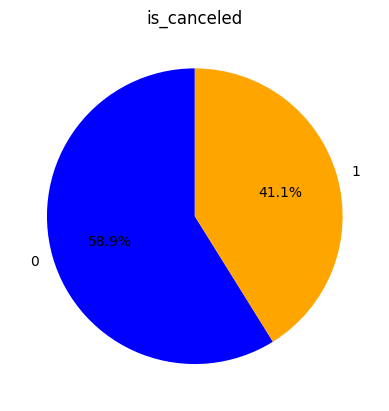

In [11]:
counts_row = freq_table['count']   # a Series with categories as index

plt.figure()
plt.pie(
    counts_row.values,
    labels=[x for x in counts_row.index],
    autopct='%1.1f%%',
    startangle=90,
    colors=['blue', 'orange']
)
plt.title('is_canceled')
plt.show()

##### Grafico de barras

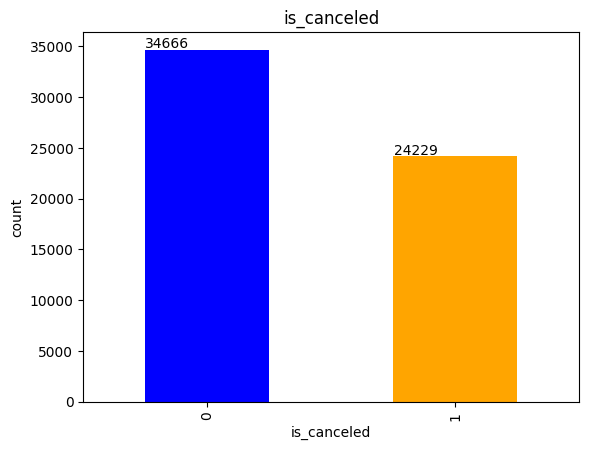

In [12]:
plt.figure()
ax = freq_table['count'].plot(kind='bar', color=['blue', 'orange'])
plt.xlabel('is_canceled')
plt.ylabel('count')
plt.title('is_canceled')

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()

### 1.2.2. lead_time

##### Analisis no gráfico

In [13]:
data['lead_time'].describe()

count    58895.000000
mean       100.050904
std        101.162420
min          0.000000
25%         17.000000
50%         69.000000
75%        157.000000
max        737.000000
Name: lead_time, dtype: float64

In [14]:
print("Skewness:", data['lead_time'].skew())
print("Kurtosis:", data['lead_time'].kurtosis())

Skewness: 1.2082573004591315
Kurtosis: 1.0087856167757177


In [15]:
col = data['lead_time']

Q1 = col.quantile(0.25)
Q3 = col.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = col[(col < lower_bound) | (col > upper_bound)]
n_outliers = outliers.count()

print("Number of outliers:", n_outliers)

Number of outliers: 1233


#### Analisis gráfico

##### Histograma

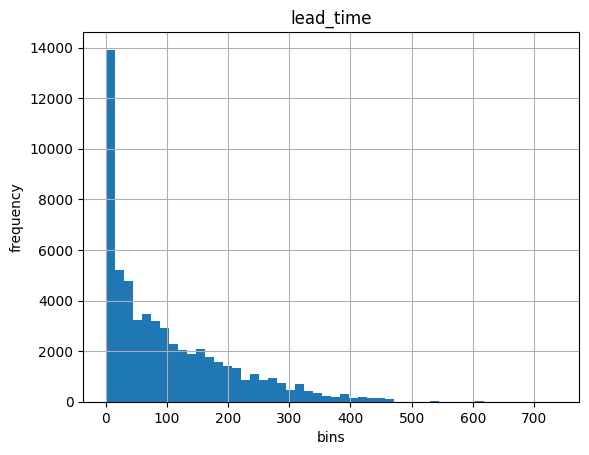

In [16]:
data['lead_time'].hist(bins=50)
plt.title('lead_time')
plt.ylabel('frequency')
plt.xlabel('bins')
plt.show()

##### Diagrama de cajas

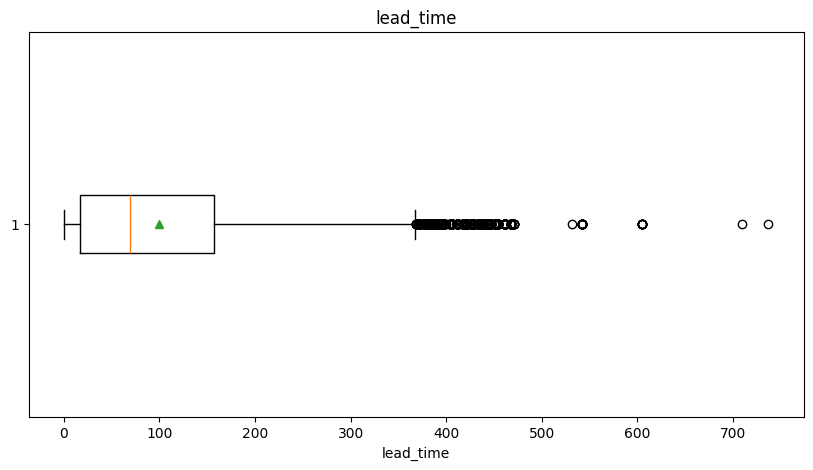

In [17]:
plt.figure(figsize=(10, 5))
plt.boxplot(data['lead_time'], showmeans=True, vert=False)
plt.title('lead_time')
plt.xlabel('lead_time')
plt.show()
plt.show()

El análisis univariado de la variable lead_time muestra una distribución fuertemente asimétrica, con una mediana de 69 días y una media superior de 100 días, lo que indica la presencia de reservas muy anticipadas que elevan el promedio. La dispersión es amplia (IQR = 140 días), con valores que van desde reservas inmediatas (0 días) hasta más de dos años (737 días). La asimetría positiva (skewness = 1.21) y la curtosis levemente (1.01) confirman la existencia de una cola larga de reservas con gran anticipación, donde se identifican 1,233 outliers (≈2.1%) por encima de 367 días. Esto refleja que, aunque la mayoría de los clientes reserva con menos de 3 a 5 meses de antelación, existe un segmento reducido que planifica su estadía con más de un año, lo cual puede tener implicaciones en el comportamiento de cancelaciones.

### 1.2.3. arrival_date_month

#### Analisis no grafico

##### Tabla de frecuencia

In [18]:
freq = data['arrival_date_month'].value_counts()
freq_pct = data['arrival_date_month'].value_counts(normalize=True).mul(100).round(2)

freq_table = pd.DataFrame({'count': freq, 'percent': freq_pct})
freq_table

,count,percent
arrival_date_month,,
August,7715,13.10
September,6712,11.40
July,6177,10.49
October,6040,10.26
May,5283,8.97
April,5185,8.80
June,4725,8.02
March,4492,7.63
February,3830,6.50


##### Moda

In [19]:
data['arrival_date_month'].mode()

0    August
Name: arrival_date_month, dtype: object

El mes que mas demada tiene es agosto.

#### Analisis Gráfico

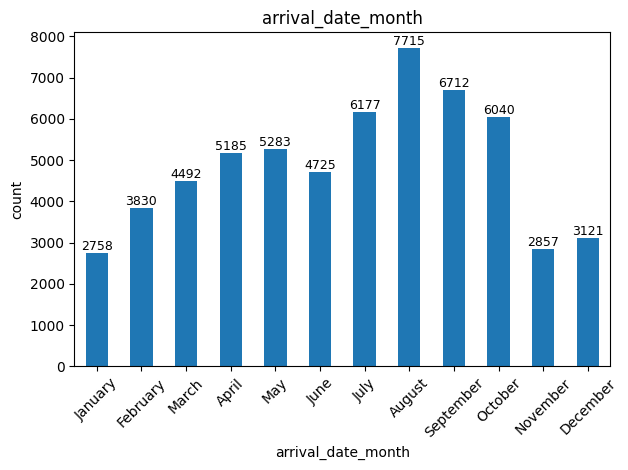

In [20]:
month_order = ['January','February','March','April','May','June',
               'July','August','September','October','November','December']

freq_ordered = freq_table['count'].reindex(month_order)

plt.figure()
ax = freq_ordered.plot(kind='bar')
ax.set_xlabel('arrival_date_month')
ax.set_ylabel('count')
ax.set_title('arrival_date_month')

for bar in ax.patches:
    h = bar.get_height()
    ax.annotate(f'{int(h)}', (bar.get_x() + bar.get_width()/2, h),
                ha='center', va='bottom', fontsize=9)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#####

De la tabla y el analisi grafico podemos concluir que los meses que mayor demanda tienen son los meses de verano, mientras que los otros meses de invierno son los que peor demanda tienen.

### 1.2.4. customer_type

#### Analisis no gráfico

##### Tabla de frecuencia

In [21]:
freq = data['customer_type'].value_counts()
freq_pct = data['customer_type'].value_counts(normalize=True).mul(100).round(2)

freq_table = pd.DataFrame({'count': freq, 'percent': freq_pct})
freq_table

,count,percent
customer_type,,
Transient,42430,72.77
Transient-Party,13078,22.43
Contract,2486,4.26
Group,312,0.54


##### Moda

In [22]:
data['customer_type'].mode()

0    Transient
Name: customer_type, dtype: object

#### Analisis Grafico

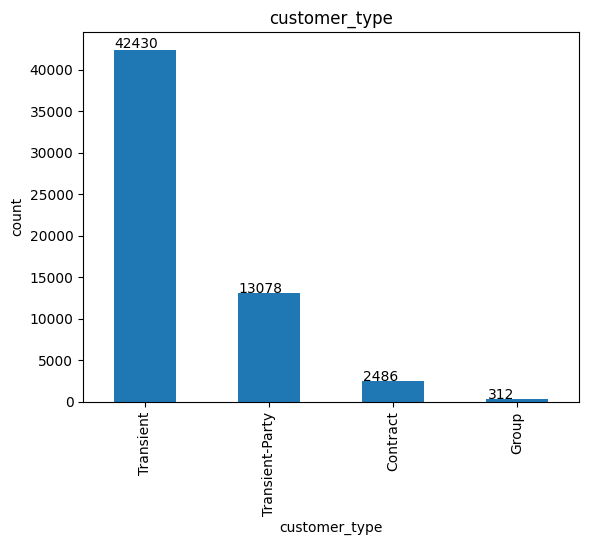

In [23]:
plt.figure()
ax = freq_table['count'].plot(kind='bar')
plt.xlabel('customer_type')
plt.ylabel('count')
plt.title('customer_type')

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()

La variable customer_type está fuertemente concentrada en reservas Transient (≈72.8%), seguidas por Transient-Party (≈22.4%); las modalidades Contract (≈4.3%) y Group (≈0.5%) son minoritarias. Esto indica que la gran mayoría de clientes reserva de forma individual y sin contrato, mientras que los grupos y contratos corporativos representan una fracción pequeña del volumen. Dado el bajo tamaño muestral de Group (312 casos) —y en menor medida Contract—, cualquier comparación o modelado por categoría debe considerar su alta incertidumbre (intervalos amplios) o, si es necesario, agrupar estas colas para obtener estimaciones más estables.

### 1.2.5. Deposit Type

#### Analisis no grafico

##### Tabla de Frecuencia

In [24]:
freq = data['deposit_type'].value_counts()
freq_pct = data['deposit_type'].value_counts(normalize=True).mul(100).round(2)

freq_table = pd.DataFrame({'count': freq, 'percent': freq_pct})
freq_table

,count,percent
deposit_type,,
No Deposit,52333,88.86
Non Refund,5457,9.27
No Refund,962,1.63
Refundable,143,0.24


##### Moda

In [25]:
data['deposit_type'].mode()

0    No Deposit
Name: deposit_type, dtype: object

#### Analisis Grafico

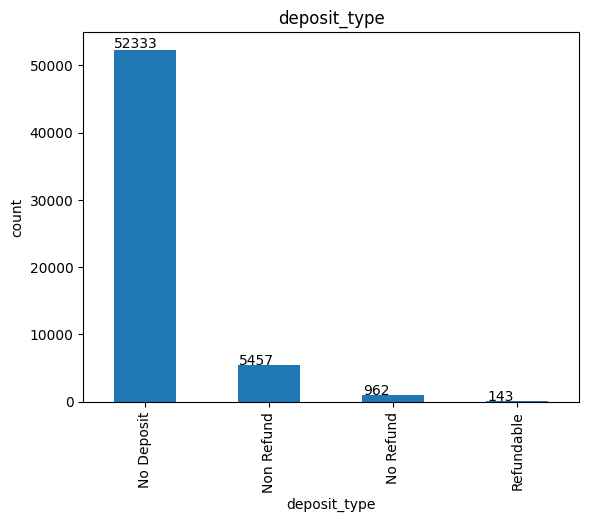

In [26]:
plt.figure()
ax = freq_table['count'].plot(kind='bar')
plt.xlabel('deposit_type')
plt.ylabel('count')
plt.title('deposit_type')

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()

La variable deposit_type muestra una distribución muy concentrada: No Deposit representa ≈88.9% de las reservas (52 333 casos), Non Refund ≈9.3% (5 457), No Refund ≈1.6% (962) y Refundable apenas ≈0.24% (143). Esto sugiere que, en este conjunto, la práctica habitual es no exigir depósito, mientras que las modalidades con penalización o reembolso son poco frecuentes.

# 2. Estrategia de análisis

El análisis se estructurará a partir de un conjunto de preguntas que se relacionan directamente con los objetivos del negocio para asi tener insights más especificos sobre preguntas concretas:
- ¿la tasa de cancelación difiere entre hoteles resort y de ciudad?
- ¿En que hotel se inclumple más la asignacion del cuarto de los clientes y como impacta esto en la cancelación?
- ¿Qué habitaciones presentan mayores tasas de cancelación por hotel?
- ¿Como se comporta la demanda de los hoteles a lo largo del año?
- ¿El tiempo de anticipación de la reserva (lead_time) influye en la probabilidad de cancelación?
- ¿El tipo de deposito influye en la probabilidad de cancelación?
- ¿Los clientes con previas cancelaciones tienden a reincidir?
- ¿Los clientes frecuentes tienden a cancelar mas/menos que los clientes que reservan por primera vez?


Para dar respuesta a las preguntas planteadas, se aplicará un conjunto de técnicas de análisis adaptadas a cada variable. En primer lugar, la comparación de la tasa de cancelación entre hoteles resort y de ciudad se abordará mediante tablas de contingencia, gráficos de barras y pruebas de hipótesis de proporciones (chi-cuadrado y z-test), complementadas con el cálculo de Cramér’s V como medida de efecto. El incumplimiento en la asignación de habitaciones se estudiará a través de cruces entre el tipo de hotel y la diferencia entre cuarto reservado y asignado, observando cancelaciones asociadas con un enfoque descriptivo. Para identificar las habitaciones con mayor cancelación por hotel, se calcularán proporciones y se aplicarán pruebas chi-cuadrado de independencia. El comportamiento de la demanda a lo largo del año se analizará de manera descriptiva, agrupando reservas por mes y graficando tendencias estacionales. La influencia del lead_time en la cancelación se evaluará con un análisis univariado de su distribución y posteriormente con pruebas t de Welch y Mann-Whitney, apoyadas en tamaños de efecto. En el caso del tipo de depósito, se construirán tablas y se aplicará chi-cuadrado para medir la asociación con la cancelación. La recurrencia de clientes con cancelaciones previas se examinará a través de proporciones y gráficas de tendencia, mientras que la diferencia entre clientes frecuentes y nuevos se analizará con proporciones, gráficos comparativos y pruebas de hipótesis.

# 3. Desarrollo de la estrategía

### 3.1. ¿La tasa de cancelación difiere entre hoteles resort y de ciudad?

Para responder esta pregunta no fue necesario hacer un tratamiento de los datos. Sin embargo, se va aplicar un tecnica de estadistica inferencial para contestar la pregunta. Especificamente la prueba de chi-cuadrado que permite investigar la relación entre variables categoricas.

In [27]:
ct = pd.crosstab(data['hotel'], data['is_canceled']).sort_index()
ct = ct.reindex(columns=[0, 1], fill_value=0)
ct.columns = ['No Cancel', 'Cancel']

summary = ct.copy()
summary['n_total'] = summary.sum(axis=1)
summary['cancel_rate'] = summary['Cancel'] / summary['n_total']
summary

,No Cancel,Cancel,n_total,cancel_rate
hotel,,,,
City Hotel,5727,13105,18832,0.695890
Resort Hotel,28939,11124,40063,0.277663


Se procede a plantear la siguiente hipotesis de la prueba Chi-Cuadrado.
La proporción de reservas canceladas es igual en los hoteles de ciudad y en los hoteles resort.
$$H_{0}:p_{city}=p_{resort}$$
$$H_{1}:¬H_{0}$$

In [28]:
chi2, pvalue, dof, expected = chi2_contingency(ct.values, correction=False)

n = ct.values.sum()
r, k = ct.shape
cramers_v = np.sqrt(chi2 / (n * (min(r, k) - 1)))

phi2 = chi2 / n
phi2_corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
r_corr = r - ((r - 1) ** 2) / (n - 1)
k_corr = k - ((k - 1) ** 2) / (n - 1)
cramers_v_corr = np.sqrt(phi2_corr / max(1e-12, min(r_corr - 1, k_corr - 1)))

print(f"Chi={chi2:.4f}, gl={dof}, p={pvalue:.6f}")
print(f"Cramér's V={cramers_v:.4f} | Cramér's V (corr)={cramers_v_corr:.4f}")

Chi=9253.4537, gl=1, p=0.000000
Cramér's V=0.3964 | Cramér's V (corr)=0.3964


Se rechaza $H_{0}$, dado un valor de chi-cuadrado tan alto y un p-value menor a la significancia de 0.05.Dado lo anterior, existe evidencia estadísticamente significativa de que la tasa de cancelación depende del tipo de hotel. Ahora bien el tamaño del efecto es moderado dado su valor de Cramer de 0.39, lo que implica que implica que el tipo de hotel explica una parte importante de la variación en las cancelaciones: los clientes del City Hotel presentan una tasa de cancelación considerablemente más alta que los del Resort Hotel. Este hallazgo sugiere que la cadena hotelera debería considerar políticas diferenciadas de gestión de reservas, precios o depósitos según el tipo de establecimiento, ya que el riesgo de cancelación no es homogéneo entre ambos.

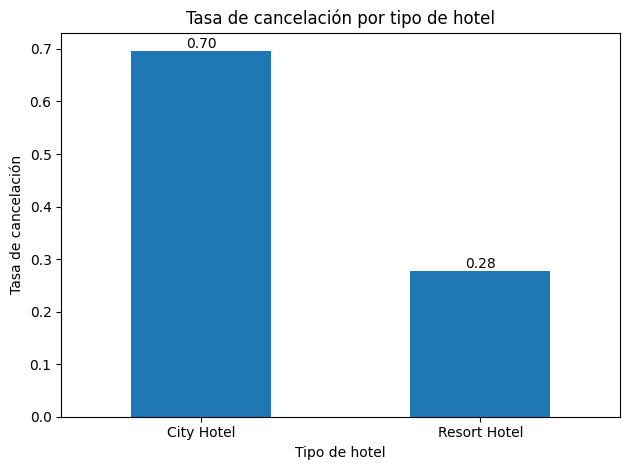

In [29]:
ax = summary['cancel_rate'].plot(kind='bar' )
ax.set_xlabel('Tipo de hotel')
ax.set_ylabel('Tasa de cancelación')
ax.set_title('Tasa de cancelación por tipo de hotel')
plt.xticks(rotation=0, ha='center')

for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

El primer insight que nos llevamos es que entre los hoteles disponibles el hotel de ciudad tiene más cancelaciones pero muchas menos reservaciones en total. Estadisticamente la diferencia entre cancelaciones entre ambos hoteles significativa. Según la grafica el hotel de la ciudad obtiene 70% de cancelaciones mientras que el hotel del Resort obtiene 28%.

### 3.2. ¿En que hotel se inclumple más la asignacion del cuarto de los clientes y como impacta esto en la cancelación?

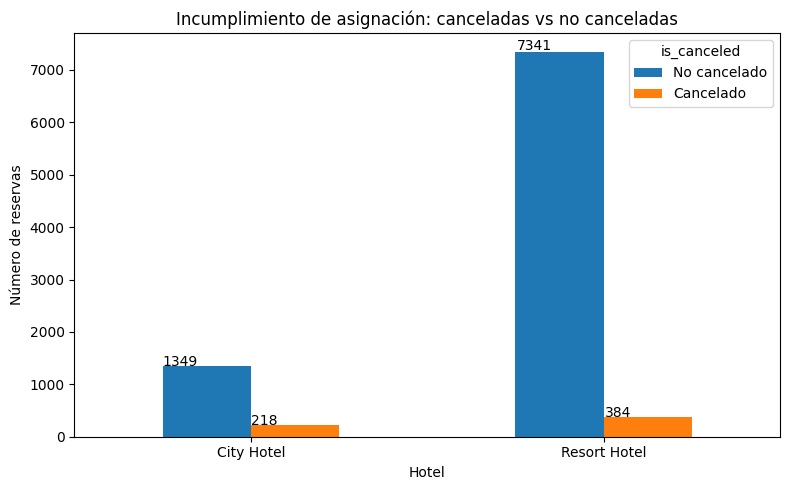

In [30]:
data['incumplimiento'] = data['reserved_room_type'] != data['assigned_room_type']

inc = data[data['incumplimiento']]

resumen = (
    inc.groupby(['hotel', 'is_canceled'])
       .size()
       .unstack(fill_value=0)
       .rename(columns={0: 'No cancelado', 1: 'Cancelado'})
)

ax = resumen.plot(kind='bar', figsize=(8,5))

ax.set_ylabel("Número de reservas")
ax.set_xlabel("Hotel")
ax.set_title("Incumplimiento de asignación: canceladas vs no canceladas")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

El insight que se obtiene con este apartado del incumplimiento del hotel al momento de entregar un cuarto basado en una seleccion del cliente. Podemos ver que la cancelación no se ve afectada si los clientes no obtuvieron el cuarto que esperaban, pues segun las graficas los valores de cancelacion son pequeños a comparacion de los no cancelados cuando se incumplio con la asignacion de un cuarto para ambos hoteles.

### 3.3. ¿Qué habitaciones presentan mayores tasas de cancelación por hotel?

In [31]:

# Agrupar por hotel y tipo de habitación reservada
grp = (
    data.groupby(['hotel', 'assigned_room_type'])['is_canceled']
      .agg(cancelations='sum', total='count', rate=lambda s: s.mean()*100)
      .reset_index()
      .sort_values(['hotel', 'rate'], ascending=[True, False])
)

grp

,hotel,assigned_room_type,cancelations,total,rate
0,City Hotel,A,10541,14343,73.492296
5,City Hotel,F,317,443,71.557562
2,City Hotel,C,7,11,63.636364
6,City Hotel,G,40,64,62.500000
3,City Hotel,D,1776,2997,59.259259
4,City Hotel,E,151,289,52.249135
1,City Hotel,B,271,662,40.936556
7,City Hotel,K,2,23,8.695652
17,Resort Hotel,L,1,1,100.000000
18,Resort Hotel,P,2,2,100.000000


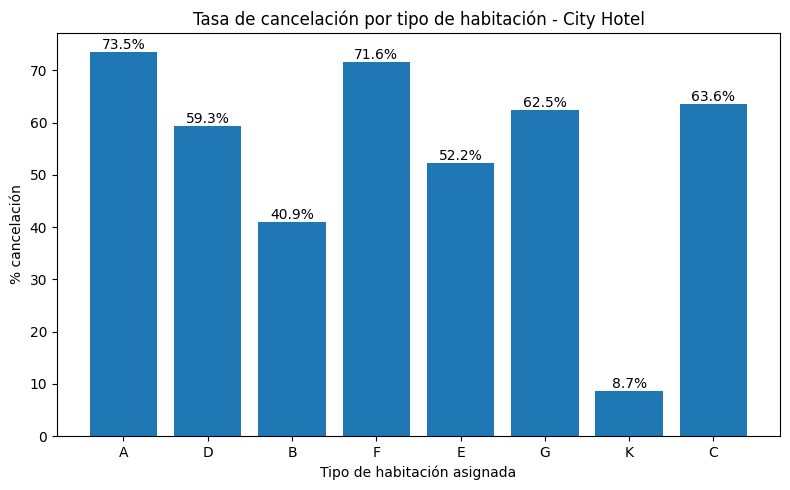

In [32]:
city = grp[grp['hotel'] == 'City Hotel'].sort_values('total', ascending=False)

plt.figure(figsize=(8,5))
plt.bar(city['assigned_room_type'], city['rate'])
plt.title("Tasa de cancelación por tipo de habitación - City Hotel")
plt.ylabel("% cancelación")
plt.xlabel("Tipo de habitación asignada")

for i, (x,y) in enumerate(zip(city['assigned_room_type'], city['rate'])):
    plt.text(i, y, f"{y:.1f}%", ha='center', va='bottom')

plt.tight_layout()
plt.show()

En el City Hotel, la mayoría de las habitaciones presentan una tasa de cancelación alta, con excepción de las habitaciones B y K, que registran los niveles más bajos. Mientras se realiza un análisis más profundo de las posibles causas de insatisfacción en los otros tipos de habitaciones, una medida táctica inmediata sería realizar upgrades hacia las habitaciones B y K en periodos de baja demanda, capitalizando su mejor aceptación entre los clientes. Esta estrategia no solo ayudaría a mejorar la experiencia del huésped, sino que también contribuiría a estabilizar la ocupación en el corto plazo.

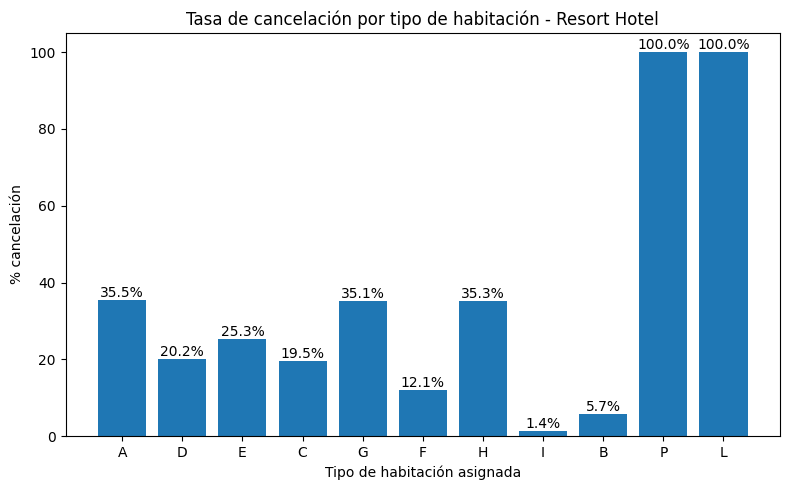

In [33]:
resort = grp[grp['hotel'] == 'Resort Hotel'].sort_values('total', ascending=False)

plt.figure(figsize=(8,5))
plt.bar(resort['assigned_room_type'], resort['rate'])
plt.title("Tasa de cancelación por tipo de habitación - Resort Hotel")
plt.ylabel("% cancelación")
plt.xlabel("Tipo de habitación asignada")

for i, (x,y) in enumerate(zip(resort['assigned_room_type'], resort['rate'])):
    plt.text(i, y, f"{y:.1f}%", ha='center', va='bottom')

plt.tight_layout()
plt.show()

En el Resort Hotel, la cancelación por tipo de habitación se encuentra más distribuida entre varias categorías, destacando tasas elevadas en las habitaciones A, G, H, P y L. Esta concentración sugiere que no se trata de un caso aislado, sino de un patrón que podría estar asociado a características específicas de estas habitaciones. Para tomar medidas efectivas, es recomendable complementar el análisis con información de satisfacción de clientes y retroalimentación directa, lo que permitiría identificar con mayor precisión los factores que generan inconformidad y orientar las acciones correctivas.

### 3.4. ¿Como se comporta la demanda de los hoteles a lo largo del año?

In [34]:
ct = pd.crosstab(
    data['hotel'],
    data['arrival_date_month'],
    dropna=False
).sort_index()
ct

arrival_date_month,April,August,December,February,January,July,June,March,May,November,October,September
hotel,,,,,,,,,,,,
City Hotel,1575,2821,473,727,565,1604,1680,1156,1723,420,2484,3604
Resort Hotel,3610,4894,2648,3103,2193,4573,3045,3336,3560,2437,3556,3108


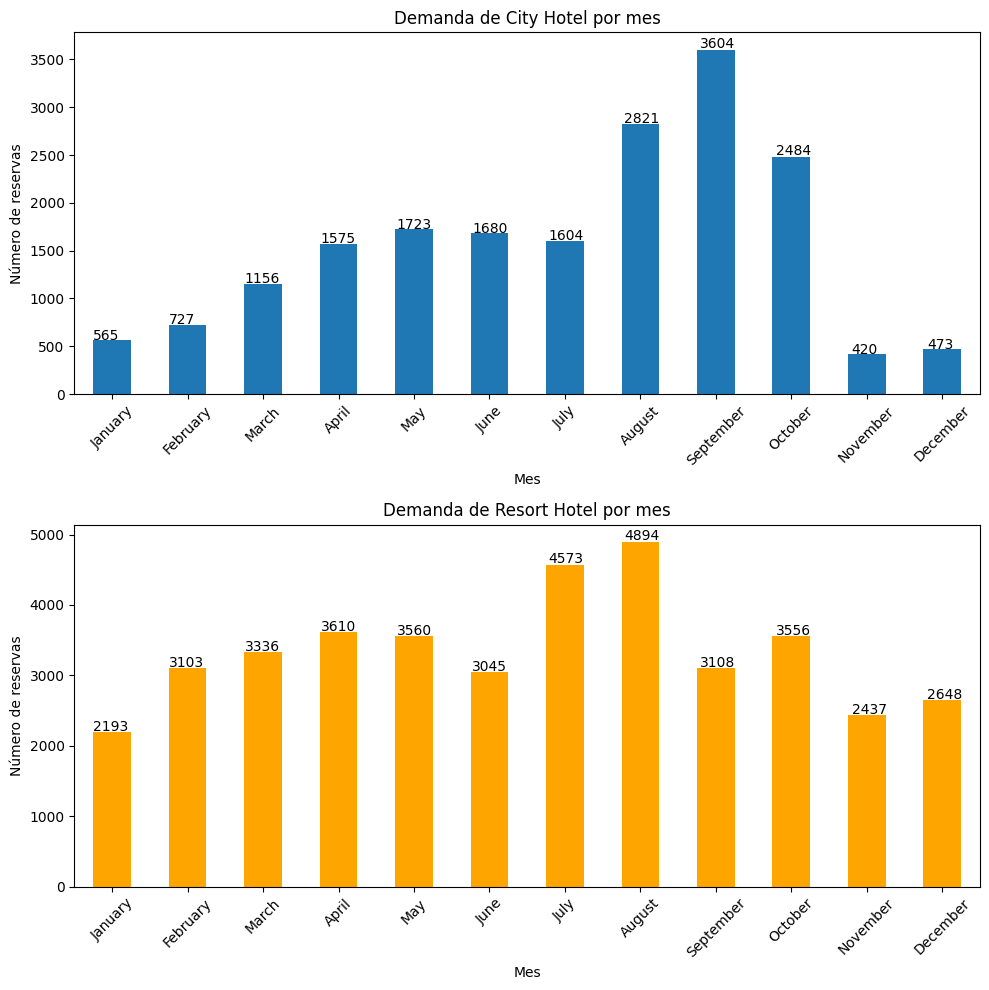

In [35]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

city_hotel_demand = ct.loc['City Hotel', month_order]
resort_hotel_demand = ct.loc['Resort Hotel', month_order]

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))

# City Hotel
ax1 = city_hotel_demand.plot(kind='bar', ax=axes[0])
ax1.set_xlabel('Mes')
ax1.set_ylabel('Número de reservas')
ax1.set_title('Demanda de City Hotel por mes')
ax1.tick_params(axis='x', rotation=45)
for p in ax1.patches:
    ax1.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))


# Resort Hote
ax2 = resort_hotel_demand.plot(kind='bar', ax=axes[1], color='orange')
ax2.set_xlabel('Mes')
ax2.set_ylabel('Número de reservas')
ax2.set_title('Demanda de Resort Hotel por mes')
ax2.tick_params(axis='x', rotation=45)
for p in ax2.patches:
    ax2.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))


plt.tight_layout()
plt.show()

El City Hotel presenta su mayor demanda en los meses de agosto, septiembre y octubre, mientras que entre marzo y julio mantiene un comportamiento estable pero sin picos destacados. Sin embargo, enero, febrero, noviembre y diciembre muestran niveles de ocupación muy bajos, lo que representa una oportunidad de mejora. Para estos meses críticos, se recomienda diseñar estrategias específicas para estimular la demanda, como la creación de eventos temáticos de fin de año y navidad en diciembre, así como la aplicación de tarifas promocionales o descuentos especiales que sirvan de incentivo para captar huéspedes adicionales.

En el caso del Resort Hotel, la demanda se concentra principalmente durante los meses de verano, donde las reservaciones alcanzan sus niveles más altos. No obstante, noviembre, diciembre y enero reflejan una baja significativa en la ocupación. Dado que este hotel se orienta a estadías familiares o de grupos, una estrategia efectiva sería incrementar la oferta de actividades y eventos en temporada baja, reforzando la propuesta de valor del resort en esos meses. Esto permitiría atraer clientes mediante experiencias diferenciadas que complementen la estadía, reduciendo así la marcada estacionalidad de su demanda.

### 3.5. ¿El tiempo de anticipación de la reserva (lead_time) influye en la probabilidad de cancelación?

Para probar esto realizamos una prueba de hipotesis basado en regresion logistica.

H0 (nula): el tiempo de anticipación no influye en la probabilidad de cancelación

𝐻0:𝛽lead_time=0	​

H1 (alternativa): el tiempo de anticipación sí influye

𝐻1:𝛽lead_time≠0

In [36]:
# --- Prueba de hipótesis: ¿lead_time influye en la probabilidad de cancelación? ---
# H0: beta_lead_time = 0  (no influye)
# H1: beta_lead_time ≠ 0  (sí influye)

import pandas as pd
import numpy as np
import statsmodels.formula.api as smf

def probar_hipotesis_lead_time(df: pd.DataFrame, alpha: float = 0.05):
    # 1) Validaciones mínimas
    for col in ["is_canceled", "lead_time"]:
        if col not in df.columns:
            raise ValueError(f"Falta la columna requerida: {col}")

    # 2) Limpieza básica y tipos
    tmp = df[["is_canceled", "lead_time"]].copy()
    tmp = tmp.dropna(subset=["is_canceled", "lead_time"])
    tmp["is_canceled"] = tmp["is_canceled"].astype(int)
    tmp["lead_time"]   = pd.to_numeric(tmp["lead_time"], errors="coerce")
    tmp = tmp.dropna(subset=["lead_time"])
    nobs = len(tmp)
    if nobs < 50:
        print(f"[Aviso] Muestra pequeña para Logit (n={nobs}). Interpreta con cautela.")

    # 3) Ajuste logit univariante (manejo de errores numéricos)
    try:
        model = smf.logit("is_canceled ~ lead_time", data=tmp).fit(disp=False, maxiter=200)
    except Exception as e:
        raise RuntimeError(f"Error al ajustar el modelo Logit: {e}")

    # 4) Estadísticos principales
    beta = model.params["lead_time"]
    pval = model.pvalues["lead_time"]
    or_1d = float(np.exp(beta))
    or_30 = float(np.exp(30 * beta))
    ci = model.conf_int().loc["lead_time"]
    ci_or = np.exp(ci.values)

    # 5) Métricas de ajuste
    llf = model.llf                # log-likelihood del modelo
    llnull = model.llnull          # log-likelihood del modelo nulo
    pseudo_r2 = 1 - llf/llnull if llnull != 0 else np.nan
    aic = model.aic
    bic = model.bic

    # 6) Decisión
    rechaza = pval < alpha
    decision = "RECHAZAS H0 (sí influye)" if rechaza else "NO rechazas H0 (no hay evidencia de influencia)"

    # 7) Reporte legible
    print("=== Prueba principal (Logit univariante) ===")
    print(f"N = {nobs}  |  Pseudo-R² (McFadden) = {pseudo_r2:.4f}  |  AIC = {aic:.1f}  |  BIC = {bic:.1f}")
    print(f"H0: β_lead_time = 0   vs   H1: β_lead_time ≠ 0   (α = {alpha})")
    print(f"Coeficiente β: {beta:.6f}")
    print(f"p-valor (Wald): {pval:.6g}")
    print(f"OR (+1 día): {or_1d:.3f}   |  IC95% OR: [{ci_or[0]:.3f}, {ci_or[1]:.3f}]")
    print(f"OR (+30 días): {or_30:.3f}")
    print(f"Decisión: {decision}")

    return {
        "n": nobs,
        "p_value": float(pval),
        "beta": float(beta),
        "odds_ratio_1d": or_1d,
        "odds_ratio_30d": or_30,
        "ci95_or": (float(ci_or[0]), float(ci_or[1])),
        "pseudo_r2_mcfadden": float(pseudo_r2) if np.isfinite(pseudo_r2) else None,
        "aic": float(aic),
        "bic": float(bic),
        "reject_H0": bool(rechaza),
        "decision_text": decision,
    }

# Ejemplo de uso:
res = probar_hipotesis_lead_time(data, alpha=0.05)
print(res)

=== Prueba principal (Logit univariante) ===
N = 58895  |  Pseudo-R² (McFadden) = 0.0444  |  AIC = 76246.0  |  BIC = 76264.0
H0: β_lead_time = 0   vs   H1: β_lead_time ≠ 0   (α = 0.05)
Coeficiente β: 0.005054
p-valor (Wald): 0
OR (+1 día): 1.005   |  IC95% OR: [1.005, 1.005]
OR (+30 días): 1.164
Decisión: RECHAZAS H0 (sí influye)
{'n': 58895, 'p_value': 0.0, 'beta': 0.0050537480362738505, 'odds_ratio_1d': 1.0050665397605199, 'odds_ratio_30d': 1.1637091431759898, 'ci95_or': (1.004892421868145, 1.0052406878223334), 'pseudo_r2_mcfadden': 0.044423945099940076, 'aic': 76245.99490721505, 'bic': 76263.96193016783, 'reject_H0': True, 'decision_text': 'RECHAZAS H0 (sí influye)'}


Con base en la regresión logística univariante (α=5%), encontramos evidencia estadísticamente significativa de que el tiempo de anticipación de la reserva influye en la probabilidad de cancelación: el coeficiente para lead_time fue positivo (β=0.005054; p≈0), por lo que, a mayor anticipación, aumentan las odds de cancelar. En términos de magnitud, el odds ratio por un día adicional es 1.005 (IC95%≈[1.005, 1.005]), lo que implica un incremento aproximado de 0,5% en las odds por día; acumulado a 30 días, el OR es 1.164, es decir, ~16,4% más en las odds de cancelación. Aunque el efecto marginal diario es pequeño, en horizontes más largos se vuelve relevante. En consecuencia, se rechaza H0 (β=0) y se concluye que el lead_time sí influye —de forma positiva— en la probabilidad de cancelación.

### 3.6. ¿El tipo de deposito influye en la probabilidad de cancelación?

H0 (nula): todos los coeficientes deC(deposit_type) son cero ⇒ el tipo de depósito no influye en la probabilidad de cancelación.

H1 (alternativa): al menos uno de los coeficientes de C(deposit_type) es distinto de cero ⇒ el tipo de depósito sí influye.

In [37]:
# --- Prueba de hipótesis: ¿deposit_type influye en la probabilidad de cancelación? ---
# H0 (global): todos los coeficientes de C(deposit_type) = 0  (no influye)
# H1 (global): al menos un coeficiente ≠ 0                  (sí influye)

import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
from scipy.stats import chi2

def probar_hipotesis_deposit_type(df: pd.DataFrame, alpha: float = 0.05, col_dep: str = "deposit_type"):
    # 1) Validaciones
    for col in ["is_canceled", col_dep]:
        if col not in df.columns:
            raise ValueError(f"Falta la columna requerida: {col!r}")
    tmp = df[["is_canceled", col_dep]].copy()
    tmp = tmp.dropna(subset=["is_canceled"])  # si deposit_type tiene NaN, lo convertimos a 'Unknown'
    tmp[col_dep] = tmp[col_dep].astype(str).fillna("Unknown").replace({"nan":"Unknown", "None":"Unknown"})
    tmp["is_canceled"] = tmp["is_canceled"].astype(int)

    # Chequeos de cardinalidad
    cats = tmp[col_dep].unique()
    if len(cats) < 2:
        raise ValueError(f"{col_dep} tiene una sola categoría en los datos filtrados ({cats}). No se puede probar influencia.")
    nobs = len(tmp)

    # 2) Modelos: nulo vs completo
    m_null = smf.logit("is_canceled ~ 1", data=tmp).fit(disp=False, maxiter=200)
    m_full = smf.logit(f"is_canceled ~ C({col_dep})", data=tmp).fit(disp=False, maxiter=200)

    # 3) Test global (Likelihood Ratio)
    ll_null, ll_full = m_null.llf, m_full.llf
    df_null, df_full = m_null.df_model + 1, m_full.df_model + 1  # +1 por el intercept
    lr_stat = 2 * (ll_full - ll_null)
    df_diff = int(df_full - df_null)
    p_global = chi2.sf(lr_stat, df_diff)

    rechaza = p_global < alpha
    decision = "RECHAZAS H0 (sí influye)" if rechaza else "NO rechazas H0 (no hay evidencia de influencia)"

    # 4) Efectos por categoría (vs referencia)
    # La referencia es la primera en orden alfabético por defecto en patsy/statsmodels;
    # puedes fijarla reordenando la categoría si lo deseas.
    coefs = m_full.params
    conf  = m_full.conf_int()
    efectos = []
    for name, beta in coefs.items():
        if name == "Intercept":
            continue
        # name típico: C(deposit_type)[T.Non Refund]
        or_val = float(np.exp(beta))
        ci_low, ci_high = np.exp(conf.loc[name].values)
        efectos.append({
            "term": name,
            "beta": float(beta),
            "OR": or_val,
            "CI95_low": float(ci_low),
            "CI95_high": float(ci_high),
            "p_value": float(m_full.pvalues[name])
        })

    # 5) Salida legible
    print("=== Prueba categórica (Logit con C(deposit_type)) ===")
    print(f"N = {nobs} | categorías = {len(cats)}")
    print(f"Test global LR: χ²({df_diff}) = {lr_stat:.2f}, p = {p_global:.4g}  (α = {alpha})")
    print(f"Decisión: {decision}\n")
    print("Odds Ratios por categoría (vs referencia):")
    ref = [c for c in coefs.index if "Intercept" in c]
    print(f"Referencia (implícita): la categoría base de C({col_dep})\n")
    for e in efectos:
        print(f"{e['term']}: OR={e['OR']:.3f}  (IC95% {e['CI95_low']:.3f}–{e['CI95_high']:.3f})  p={e['p_value']:.3g}")


    return {
        "n": nobs,
        "categories": sorted(cats.tolist()),
        "lr_stat": float(lr_stat),
        "df_diff": df_diff,
        "p_global": float(p_global),
        "reject_H0": bool(rechaza),
        "decision_text": decision,
        "effects_vs_reference": efectos,
        "reference_note": f"La categoría de referencia es la base implícita en C({col_dep}). "
                          f"Si deseas forzar una referencia específica, convierte {col_dep} en Categorical con 'cat.reorder_categories(...)'."
    }

# Ejemplo de uso:
res_dep = probar_hipotesis_deposit_type(data, alpha=0.05, col_dep="deposit_type")

=== Prueba categórica (Logit con C(deposit_type)) ===
N = 58895 | categorías = 4
Test global LR: χ²(3) = 11722.63, p = 0  (α = 0.05)
Decisión: RECHAZAS H0 (sí influye)

Odds Ratios por categoría (vs referencia):
Referencia (implícita): la categoría base de C(deposit_type)

C(deposit_type)[T.No Refund]: OR=230.233  (IC95% 114.778–461.820)  p=6.09e-53
C(deposit_type)[T.Non Refund]: OR=170.785  (IC95% 132.608–219.953)  p=0
C(deposit_type)[T.Refundable]: OR=0.351  (IC95% 0.223–0.553)  p=6.38e-06


  deposit_type  cancelados  total  no_cancelados  pct_cancelados
0    No Refund         954    962              8       99.168399
1   Non Refund        5396   5457             61       98.882170
2   No Deposit       17857  52333          34476       34.121873
3   Refundable          22    143            121       15.384615


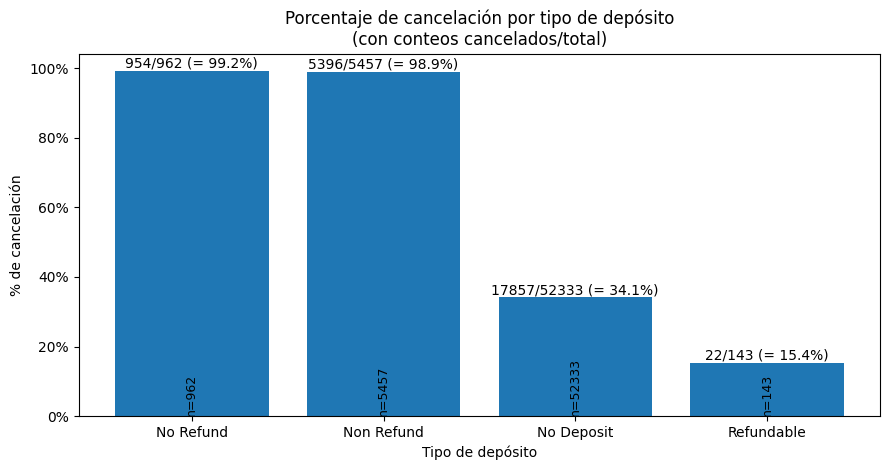

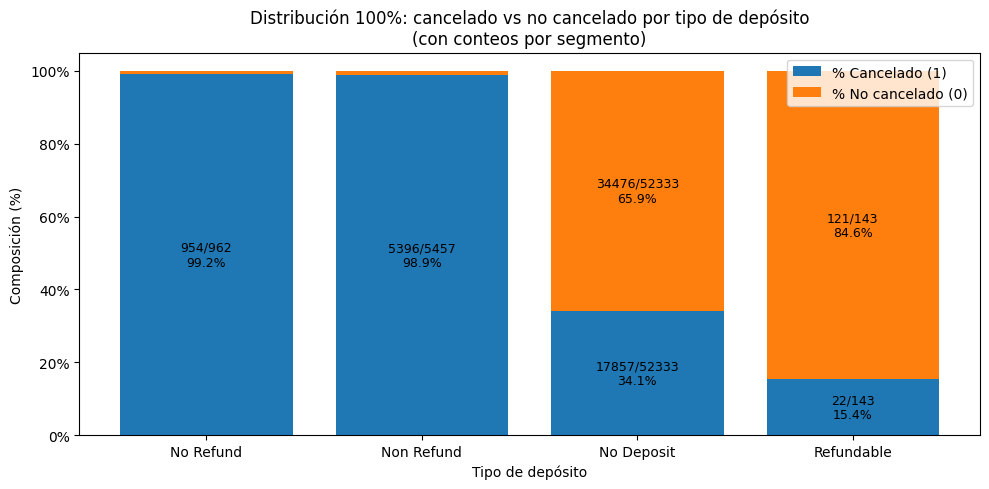

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

def _coerce_binary_cancel(s):
    # Convierte is_canceled a 0/1 de forma robusta
    s = pd.to_numeric(s, errors="coerce")
    s = s.fillna(0)
    return (s > 0).astype(int)

def resumen_cancelaciones_por_deposito(df: pd.DataFrame, col_dep: str = "deposit_type"):
    tmp = df[[col_dep, "is_canceled"]].copy()
    tmp = tmp.dropna(subset=[col_dep])  # solo para agrupar bien; puedes quitar si quieres contar Unknown
    tmp[col_dep] = (tmp[col_dep].astype(str)
                    .str.strip()
                    .replace({"nan":"Unknown","None":"Unknown","": "Unknown"}))
    tmp["is_canceled"] = _coerce_binary_cancel(tmp["is_canceled"])

    g = tmp.groupby(col_dep)["is_canceled"].agg(
        cancelados="sum",
        total="count"
    ).reset_index()
    g["no_cancelados"] = g["total"] - g["cancelados"]
    g["pct_cancelados"] = 100 * g["cancelados"] / g["total"]
    # Ordena de mayor a menor % cancelados
    g = g.sort_values("pct_cancelados", ascending=False).reset_index(drop=True)
    return g

def plot_porcentaje_con_cuentas(df: pd.DataFrame, col_dep: str = "deposit_type"):
    g = resumen_cancelaciones_por_deposito(df, col_dep)
    plt.figure(figsize=(9, 4.8))
    plt.bar(g[col_dep].astype(str), g["pct_cancelados"])
    # Etiquetas: "cancelados/total (=xx.x%)"
    for i, (cat, c, t, p) in enumerate(zip(g[col_dep], g["cancelados"], g["total"], g["pct_cancelados"])):
        plt.text(i, p, f"{int(c)}/{int(t)} (= {p:.1f}%)", ha="center", va="bottom", fontsize=10)
    # n al pie
    for i, t in enumerate(g["total"]):
        plt.text(i, 0, f"n={int(t)}", ha="center", va="bottom", fontsize=9, rotation=90)
    plt.gca().yaxis.set_major_formatter(PercentFormatter())
    plt.ylabel("% de cancelación")
    plt.xlabel("Tipo de depósito")
    plt.title("Porcentaje de cancelación por tipo de depósito\n(con conteos cancelados/total)")
    plt.tight_layout()
    plt.show()

def plot_apilado_100_con_cuentas(df: pd.DataFrame, col_dep: str = "deposit_type"):
    g = resumen_cancelaciones_por_deposito(df, col_dep)
    # Para el apilado necesitamos el orden ya calculado
    idx = np.arange(len(g))
    pct_cancel = g["pct_cancelados"].values
    pct_no     = 100 - pct_cancel

    plt.figure(figsize=(10, 5))
    plt.bar(idx, pct_cancel, label="% Cancelado (1)")
    plt.bar(idx, pct_no, bottom=pct_cancel, label="% No cancelado (0)")
    # Etiquetas internas + totals arriba
    for i, (p1, p0, c, t) in enumerate(zip(pct_cancel, pct_no, g["cancelados"], g["total"])):
        # Dentro de la parte cancelada
        if p1 > 4:  # evita solape si es muy pequeño
            plt.text(i, p1/2, f"{int(c)}/{int(t)}\n{p1:.1f}%", ha="center", va="center", fontsize=9)
        else:
            # Si es muy pequeño, escribe arriba de la barra
            plt.text(i, p1 + 1, f"{int(c)}/{int(t)} ({p1:.1f}%)", ha="center", va="bottom", fontsize=9)
        # Dentro de la parte no cancelada
        if p0 > 4:
            plt.text(i, p1 + p0/2, f"{int(t-c)}/{int(t)}\n{p0:.1f}%", ha="center", va="center", fontsize=9)

    plt.xticks(idx, g[col_dep].astype(str), rotation=0)
    plt.gca().yaxis.set_major_formatter(PercentFormatter())
    plt.ylabel("Composición (%)")
    plt.xlabel("Tipo de depósito")
    plt.title("Distribución 100%: cancelado vs no cancelado por tipo de depósito\n(con conteos por segmento)")
    plt.legend()
    plt.tight_layout()
    plt.show()

# --- Ejecucion ------:
summary = resumen_cancelaciones_por_deposito(data, col_dep="deposit_type")
print(summary)                   # <-- tabla auditable: cancelados/total y %
plot_porcentaje_con_cuentas(data, col_dep="deposit_type")
plot_apilado_100_con_cuentas(data, col_dep="deposit_type")


Con base en la regresión logística con C(deposit_type), el contraste global por razón de verosimilitudes fue altamente significativo (χ²(3)=11 722.63, p≈0), por lo que rechazamos H0 al 5% y concluimos que el tipo de depósito sí influye en la probabilidad de cancelación. En la comparación respecto a la categoría de referencia (implícita), las reservas con “No Refund” presentan odds de cancelación aproximadamente 230 veces mayores (OR=230.233; IC95%: 114.778–461.820; p≈6.09×10⁻⁵³) y las “Non Refund” cerca de 171 veces mayores (OR=170.785; IC95%: 132.608–219.953; p≈0). Por el contrario, las “Refundable” exhiben odds de cancelación 65% menores que la referencia (OR=0.351; IC95%: 0.223–0.553; p≈6.38×10⁻⁶). Estos resultados muestran que la política de depósito es un determinante clave del riesgo de cancelación, con diferencias muy marcadas entre modalidades.

### 3.7. ¿Los clientes con previas cancelaciones tienden a reincidir?

H0 (nula): β(prev_any)​=0 ⇒ haber tenido cancelaciones previas no influye en la probabilidad de cancelar.

H1 (alternativa): 𝛽(prev_any)≠0 ⇒ haber tenido cancelaciones previas sí influye.

In [39]:
# --- 3.7 ¿Clientes con previas cancelaciones tienden a reincidir? ---
# H0: β_prev_any = 0 (no influye)
# H1: β_prev_any ≠ 0 (sí influye)

import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
from scipy.stats import chi2_contingency

def probar_hipotesis_reincidencia(df: pd.DataFrame, alpha: float = 0.05,
                                  prev_col: str = "previous_cancellations"):
    # 1) Validaciones y binarización
    for col in ["is_canceled", prev_col]:
        if col not in df.columns:
            raise ValueError(f"Falta la columna requerida: {col!r}")
    tmp = df[["is_canceled", prev_col]].copy()
    tmp = tmp.dropna(subset=["is_canceled", prev_col])
    tmp["is_canceled"] = tmp["is_canceled"].astype(int)
    tmp[prev_col] = pd.to_numeric(tmp[prev_col], errors="coerce")
    tmp = tmp.dropna(subset=[prev_col])
    tmp["prev_any"] = (tmp[prev_col] > 0).astype(int)
    nobs = len(tmp)
    if nobs < 50:
        print(f"[Aviso] Muestra pequeña para Logit (n={nobs}). Interpreta con cautela.")

    # Chequeo de variabilidad
    if tmp["prev_any"].nunique() < 2:
        raise ValueError("La variable binaria 'prev_any' no tiene variación (todo 0 o todo 1).")

    # 2) Modelo logit univariante
    model = smf.logit("is_canceled ~ prev_any", data=tmp).fit(disp=False, maxiter=200)
    beta = model.params["prev_any"]
    pval = model.pvalues["prev_any"]
    or_val = float(np.exp(beta))
    ci = model.conf_int().loc["prev_any"].values
    ci_or = np.exp(ci)

    # Métricas de ajuste
    llf, llnull = model.llf, model.llnull
    pseudo_r2 = 1 - llf/llnull if llnull != 0 else np.nan
    aic, bic = model.aic, model.bic

    # 3) Decisión principal
    rechaza = pval < alpha
    decision = "RECHAZAS H0 (sí influye)" if rechaza else "NO rechazas H0 (no hay evidencia de influencia)"

    # 4) Chequeo de robustez: χ² en tabla 2x2 (dos proporciones)
    ct = pd.crosstab(tmp["prev_any"], tmp["is_canceled"])  # filas: prev_any (0/1), cols: cancel (0/1)
    chi2, p_chi, dof, _ = chi2_contingency(ct)

    # 5) Reporte
    print("=== Prueba principal (Logit: prev_any → is_canceled) ===")
    print(f"N = {nobs} | Pseudo-R² = {pseudo_r2:.4f} | AIC = {aic:.1f} | BIC = {bic:.1f}")
    print(f"H0: β_prev_any = 0   vs   H1: β_prev_any ≠ 0   (α = {alpha})")
    print(f"Coeficiente β: {beta:.6f}")
    print(f"p-valor (Wald): {pval:.4g}")
    print(f"OR (prev_any=1 vs 0): {or_val:.3f}  (IC95% {ci_or[0]:.3f}–{ci_or[1]:.3f})")
    print(f"Decisión: {decision}\n")

    print("=== Chequeo de robustez (χ² de independencia 2x2) ===")
    print(f"Tabla 2x2 (prev_any x is_canceled):\n{ct}\n")
    print(f"χ²({dof}) = {chi2:.2f}, p = {p_chi:.4g}  (α = {alpha})")
    print("Conclusión χ²:", "Asociación significativa" if p_chi < alpha else "No significativa")

    return {
        "n": int(nobs),
        "beta": float(beta),
        "p_wald": float(pval),
        "odds_ratio_prev_any": float(or_val),
        "ci95_or": (float(ci_or[0]), float(ci_or[1])),
        "pseudo_r2_mcfadden": float(pseudo_r2) if np.isfinite(pseudo_r2) else None,
        "aic": float(aic),
        "bic": float(bic),
        "reject_H0": bool(rechaza),
        "decision_text": decision,
        "chi2": float(chi2),
        "p_chi2": float(p_chi),
    }

# Ejemplo de uso:
res_prev = probar_hipotesis_reincidencia(data, alpha=0.05, prev_col="previous_cancellations")


=== Prueba principal (Logit: prev_any → is_canceled) ===
N = 58895 | Pseudo-R² = 0.0112 | AIC = 78900.5 | BIC = 78918.5
H0: β_prev_any = 0   vs   H1: β_prev_any ≠ 0   (α = 0.05)
Coeficiente β: 2.079195
p-valor (Wald): 2.759e-136
OR (prev_any=1 vs 0): 7.998  (IC95% 6.788–9.423)
Decisión: RECHAZAS H0 (sí influye)

=== Chequeo de robustez (χ² de independencia 2x2) ===
Tabla 2x2 (prev_any x is_canceled):
is_canceled      0      1
prev_any                 
0            34495  23305
1              171    924

χ²(1) = 859.85, p = 5.257e-189  (α = 0.05)
Conclusión χ²: Asociación significativa


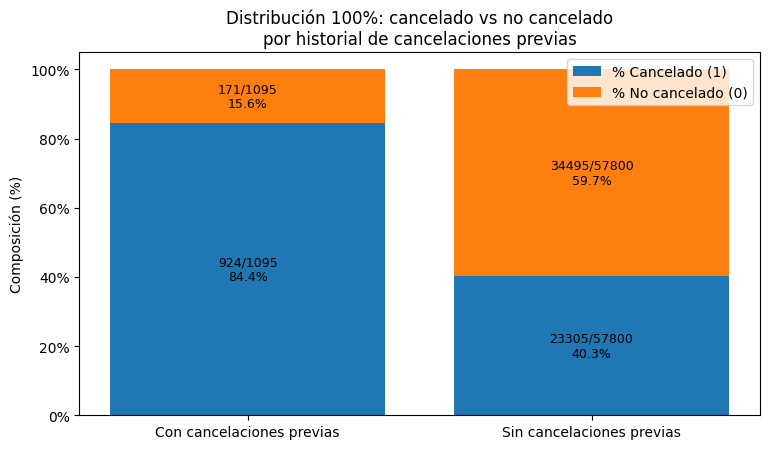

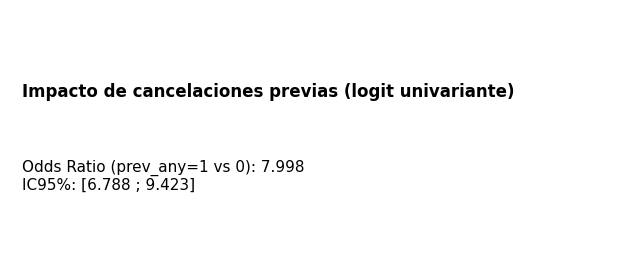

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import statsmodels.formula.api as smf
from statsmodels.stats.proportion import proportion_confint

# --- Utilidad: construir la binaria 'prev_any' y un resumen auditable
def _coerce_binary_cancel(s):
    s = pd.to_numeric(s, errors="coerce").fillna(0)
    return (s > 0).astype(int)

def resumen_reincidencia(df: pd.DataFrame, prev_col="previous_cancellations"):
    tmp = df[[prev_col, "is_canceled"]].copy()
    tmp["is_canceled"] = _coerce_binary_cancel(tmp["is_canceled"])
    tmp[prev_col] = pd.to_numeric(tmp[prev_col], errors="coerce")
    tmp = tmp.dropna(subset=[prev_col])
    tmp["prev_any"] = (tmp[prev_col] > 0).astype(int)

    g = tmp.groupby("prev_any")["is_canceled"].agg(cancelados="sum", total="count").reset_index()
    g["pct_cancel"] = 100 * g["cancelados"] / g["total"]
    # IC95% (Wilson) para el % cancelado en cada grupo
    lo, hi = proportion_confint(g["cancelados"], g["total"], alpha=0.05, method="wilson")
    g["ci_low"] = lo * 100
    g["ci_high"] = hi * 100
    # Ordenar: primero el grupo con mayor % cancelación
    g = g.sort_values("pct_cancel", ascending=False).reset_index(drop=True)
    return g, tmp

# --- Gráfico 2: apilado 100% (no cancelado vs cancelado) para cada grupo
def plot_100pct_stack_prev_any(df: pd.DataFrame, prev_col="previous_cancellations"):
    g, _ = resumen_reincidencia(df, prev_col)
    idx = np.arange(len(g))
    pct1 = g["pct_cancel"].values
    pct0 = 100 - pct1
    labels = g["prev_any"].map({0:"Sin cancelaciones previas", 1:"Con cancelaciones previas"})

    plt.figure(figsize=(7.8,4.6))
    plt.bar(idx, pct1, label="% Cancelado (1)")
    plt.bar(idx, pct0, bottom=pct1, label="% No cancelado (0)")
    for i, (p1, p0, c, t) in enumerate(zip(pct1, pct0, g["cancelados"], g["total"])):
        if p1 > 5:
            plt.text(i, p1/2, f"{int(c)}/{int(t)}\n{p1:.1f}%", ha="center", va="center", fontsize=9)
        else:
            plt.text(i, p1 + 1, f"{int(c)}/{int(t)} ({p1:.1f}%)", ha="center", va="bottom", fontsize=9)
        if p0 > 5:
            plt.text(i, p1 + p0/2, f"{int(t-c)}/{int(t)}\n{p0:.1f}%", ha="center", va="center", fontsize=9)
    plt.xticks(idx, labels)
    plt.gca().yaxis.set_major_formatter(PercentFormatter())
    plt.ylabel("Composición (%)")
    plt.title("Distribución 100%: cancelado vs no cancelado\npor historial de cancelaciones previas")
    plt.legend()
    plt.tight_layout()
    plt.show()

# --- Gráfico 3: “card” con OR del logit e IC95% (mensaje ejecutivo en 1 cifra)
def card_or_prev_any(df: pd.DataFrame, prev_col="previous_cancellations"):
    _, tmp = resumen_reincidencia(df, prev_col)
    m = smf.logit("is_canceled ~ prev_any", data=tmp).fit(disp=False, maxiter=200)
    beta = m.params["prev_any"]
    se   = m.bse["prev_any"]
    orv  = float(np.exp(beta))
    ci   = (float(np.exp(beta - 1.96*se)), float(np.exp(beta + 1.96*se)))

    fig = plt.figure(figsize=(6.5,2.8))
    plt.text(0.02, 0.65, "Impacto de cancelaciones previas (logit univariante)", fontsize=12, weight="bold")
    plt.text(0.02, 0.28, f"Odds Ratio (prev_any=1 vs 0): {orv:.3f}\nIC95%: [{ci[0]:.3f} ; {ci[1]:.3f}]", fontsize=11)
    plt.axis("off")
    plt.tight_layout()
    plt.show()

# ---- Ejecución (elige los que quieras mostrar) ----
plot_100pct_stack_prev_any(data, "previous_cancellations")
card_or_prev_any(data, "previous_cancellations")


Estimamos una regresión logística univariante donde la variable explicativa es prev_any (1 si el cliente registra al menos una cancelación previa) y la respuesta es is_canceled. El coeficiente para prev_any fue positivo y grande (β=2.079; p≈2.76×10⁻¹³⁶), por lo que rechazamos H0 al 5% y concluimos que contar con cancelaciones previas sí influye en la probabilidad de cancelar. En términos de magnitud, el odds ratio para clientes con historial previo frente a quienes no lo tienen es 7.998 (IC95%: 6.788–9.423), es decir, las odds de cancelar son aproximadamente ocho veces mayores en reincidentes. Como verificación no paramétrica, el test χ² de independencia sobre la tabla 2×2 fue también altamente significativo (χ²(1)=859.85; p≈5.26×10⁻¹⁸⁹), corroborando la asociación: la tasa empírica de cancelación fue ≈84.3% en clientes con historial previo (924/1,095) versus ≈40.3% en clientes sin historial (23,305/57,800). Aunque el pseudo-R² (0.011) es bajo —lo habitual en modelos logísticos con un único predictor—, los resultados muestran evidencia contundente de reincidencia en la cancelación.

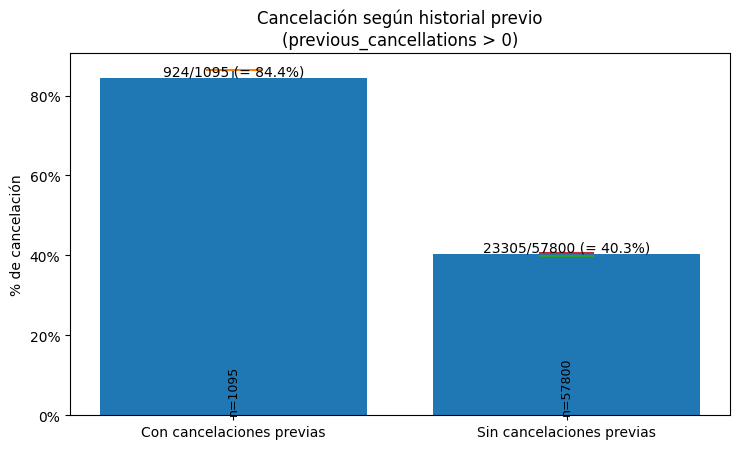

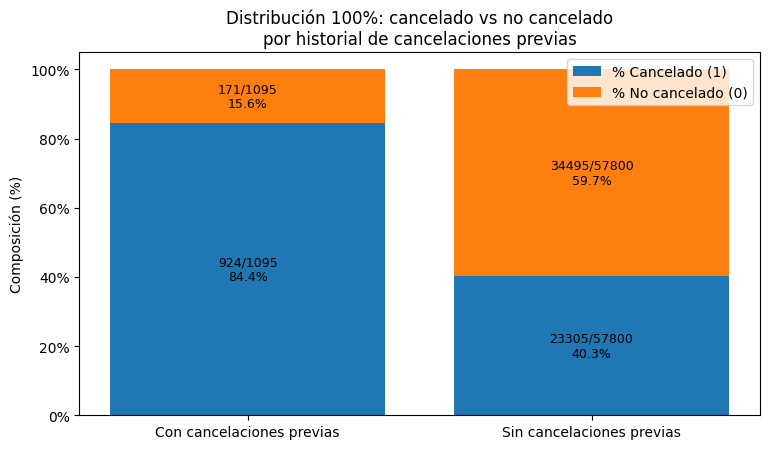

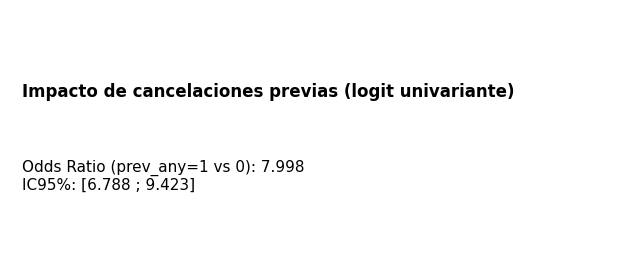

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import statsmodels.formula.api as smf
from statsmodels.stats.proportion import proportion_confint

# --- Utilidad: construir la binaria 'prev_any' y un resumen auditable
def _coerce_binary_cancel(s):
    s = pd.to_numeric(s, errors="coerce").fillna(0)
    return (s > 0).astype(int)

def resumen_reincidencia(df: pd.DataFrame, prev_col="previous_cancellations"):
    tmp = df[[prev_col, "is_canceled"]].copy()
    tmp["is_canceled"] = _coerce_binary_cancel(tmp["is_canceled"])
    tmp[prev_col] = pd.to_numeric(tmp[prev_col], errors="coerce")
    tmp = tmp.dropna(subset=[prev_col])
    tmp["prev_any"] = (tmp[prev_col] > 0).astype(int)

    g = tmp.groupby("prev_any")["is_canceled"].agg(cancelados="sum", total="count").reset_index()
    g["pct_cancel"] = 100 * g["cancelados"] / g["total"]
    # IC95% (Wilson) para el % cancelado en cada grupo
    lo, hi = proportion_confint(g["cancelados"], g["total"], alpha=0.05, method="wilson")
    g["ci_low"] = lo * 100
    g["ci_high"] = hi * 100
    # Ordenar: primero el grupo con mayor % cancelación
    g = g.sort_values("pct_cancel", ascending=False).reset_index(drop=True)
    return g, tmp

# --- Gráfico 1: barras con % de cancelación y etiqueta "cancelados/total (= xx.x%)"
def plot_pct_cancel_prev_any(df: pd.DataFrame, prev_col="previous_cancellations"):
    g, _ = resumen_reincidencia(df, prev_col)
    labels = g["prev_any"].map({0:"Sin cancelaciones previas", 1:"Con cancelaciones previas"})
    plt.figure(figsize=(7.5,4.6))
    plt.bar(labels, g["pct_cancel"])
    # error bars (IC95% Wilson)
    for i, (y, lo, hi, c, t) in enumerate(zip(g["pct_cancel"], g["ci_low"], g["ci_high"], g["cancelados"], g["total"])):
        # barra de error vertical
        plt.vlines(i, lo, hi)
        plt.plot([i-0.08, i+0.08], [lo, lo])
        plt.plot([i-0.08, i+0.08], [hi, hi])
        # etiqueta superior con conteo y %
        plt.text(i, y, f"{int(c)}/{int(t)} (= {y:.1f}%)", ha="center", va="bottom", fontsize=10)
    for i,t in enumerate(g["total"]):
        plt.text(i, 0, f"n={int(t)}", ha="center", va="bottom", fontsize=9, rotation=90)
    plt.gca().yaxis.set_major_formatter(PercentFormatter())
    plt.ylabel("% de cancelación")
    plt.title("Cancelación según historial previo\n(previous_cancellations > 0)")
    plt.tight_layout()
    plt.show()

# --- Gráfico 2: apilado 100% (no cancelado vs cancelado) para cada grupo
def plot_100pct_stack_prev_any(df: pd.DataFrame, prev_col="previous_cancellations"):
    g, _ = resumen_reincidencia(df, prev_col)
    idx = np.arange(len(g))
    pct1 = g["pct_cancel"].values
    pct0 = 100 - pct1
    labels = g["prev_any"].map({0:"Sin cancelaciones previas", 1:"Con cancelaciones previas"})

    plt.figure(figsize=(7.8,4.6))
    plt.bar(idx, pct1, label="% Cancelado (1)")
    plt.bar(idx, pct0, bottom=pct1, label="% No cancelado (0)")
    for i, (p1, p0, c, t) in enumerate(zip(pct1, pct0, g["cancelados"], g["total"])):
        if p1 > 5:
            plt.text(i, p1/2, f"{int(c)}/{int(t)}\n{p1:.1f}%", ha="center", va="center", fontsize=9)
        else:
            plt.text(i, p1 + 1, f"{int(c)}/{int(t)} ({p1:.1f}%)", ha="center", va="bottom", fontsize=9)
        if p0 > 5:
            plt.text(i, p1 + p0/2, f"{int(t-c)}/{int(t)}\n{p0:.1f}%", ha="center", va="center", fontsize=9)
    plt.xticks(idx, labels)
    plt.gca().yaxis.set_major_formatter(PercentFormatter())
    plt.ylabel("Composición (%)")
    plt.title("Distribución 100%: cancelado vs no cancelado\npor historial de cancelaciones previas")
    plt.legend()
    plt.tight_layout()
    plt.show()

# --- Gráfico 3: “card” con OR del logit e IC95% (mensaje ejecutivo en 1 cifra)
def card_or_prev_any(df: pd.DataFrame, prev_col="previous_cancellations"):
    _, tmp = resumen_reincidencia(df, prev_col)
    m = smf.logit("is_canceled ~ prev_any", data=tmp).fit(disp=False, maxiter=200)
    beta = m.params["prev_any"]
    se   = m.bse["prev_any"]
    orv  = float(np.exp(beta))
    ci   = (float(np.exp(beta - 1.96*se)), float(np.exp(beta + 1.96*se)))

    fig = plt.figure(figsize=(6.5,2.8))
    plt.text(0.02, 0.65, "Impacto de cancelaciones previas (logit univariante)", fontsize=12, weight="bold")
    plt.text(0.02, 0.28, f"Odds Ratio (prev_any=1 vs 0): {orv:.3f}\nIC95%: [{ci[0]:.3f} ; {ci[1]:.3f}]", fontsize=11)
    plt.axis("off")
    plt.tight_layout()
    plt.show()

# ---- Ejecución ------
plot_pct_cancel_prev_any(data, "previous_cancellations")
plot_100pct_stack_prev_any(data, "previous_cancellations")
card_or_prev_any(data, "previous_cancellations")


### 3.8. ¿Los clientes frecuentes tienden a cancelar mas/menos que los clientes que reservan por primera vez?

H0 (nula):
𝛽(is_repeated_guest)=0 ⇒ ser cliente frecuente no cambia la probabilidad de cancelación respecto a un cliente primerizo.

H1 (alternativa):
𝛽(is_repeated_guest) ≠ 0 ⇒ ser cliente frecuente sí cambia dicha probabilidad.

In [42]:
# --- 3.8 ¿Clientes frecuentes (is_repeated_guest) cancelan más/menos que los primerizos? ---
# H0: β_repeated = 0  (no hay diferencia en prob. de cancelación entre repetidos y primerizos)
# H1: β_repeated ≠ 0  (sí hay diferencia)

import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
from scipy.stats import chi2_contingency
from statsmodels.stats.proportion import proportions_ztest

def probar_hipotesis_clientes_frecuentes(df: pd.DataFrame, alpha: float = 0.05,
                                         col_rep: str = "is_repeated_guest"):
    # 1) Validaciones y normalización binaria
    for col in ["is_canceled", col_rep]:
        if col not in df.columns:
            raise ValueError(f"Falta la columna requerida: {col!r}")
    tmp = df[["is_canceled", col_rep]].copy()
    tmp = tmp.dropna(subset=["is_canceled", col_rep])

    # Convertir is_canceled a 0/1
    tmp["is_canceled"] = pd.to_numeric(tmp["is_canceled"], errors="coerce").astype("Int64")
    tmp = tmp.dropna(subset=["is_canceled"])
    tmp["is_canceled"] = tmp["is_canceled"].astype(int)

    # Mapear is_repeated_guest a 0/1 (acepta bools, 0/1, strings)
    def to_binary(x):
        if pd.isna(x): return np.nan
        if isinstance(x, (int, np.integer, float, np.floating)):
            return int(x != 0)
        if isinstance(x, bool):
            return int(x)
        s = str(x).strip().lower()
        return 1 if s in {"1","true","t","yes","y","si","sí"} else 0
    tmp[col_rep] = tmp[col_rep].apply(to_binary)
    tmp = tmp.dropna(subset=[col_rep])
    tmp[col_rep] = tmp[col_rep].astype(int)

    # Chequeo de variación
    if tmp[col_rep].nunique() < 2:
        raise ValueError(f"{col_rep} no tiene variación (todo 0 o todo 1).")
    nobs = len(tmp)

    # 2) Logit univariante: is_canceled ~ is_repeated_guest
    model = smf.logit(f"is_canceled ~ {col_rep}", data=tmp).fit(disp=False, maxiter=200)
    beta = model.params[col_rep]
    p_wald = model.pvalues[col_rep]
    or_val = float(np.exp(beta))
    ci_low, ci_high = np.exp(model.conf_int().loc[col_rep].values)

    llf, llnull = model.llf, model.llnull
    pseudo_r2 = 1 - llf/llnull if llnull != 0 else np.nan
    aic, bic = model.aic, model.bic

    rechaza = p_wald < alpha
    decision = "RECHAZAS H0 (sí influye)" if rechaza else "NO rechazas H0 (no hay evidencia de influencia)"

    # 3) Robustez: χ² 2x2 e igualdad de proporciones
    ct = pd.crosstab(tmp[col_rep], tmp["is_canceled"])  # filas: repetido(0/1), cols: cancel(0/1)
    chi2, p_chi, dof, _ = chi2_contingency(ct)

    # Prueba dos proporciones: p(cancel|rep=1) vs p(cancel|rep=0)
    canc_rep1 = ct.loc[1, 1] if (1 in ct.index and 1 in ct.columns) else 0
    n_rep1     = ct.loc[1].sum() if 1 in ct.index else 0
    canc_rep0 = ct.loc[0, 1] if (0 in ct.index and 1 in ct.columns) else 0
    n_rep0     = ct.loc[0].sum() if 0 in ct.index else 0

    if n_rep0 > 0 and n_rep1 > 0:
        stat_z, p_z = proportions_ztest(count=[canc_rep1, canc_rep0],
                                        nobs=[n_rep1, n_rep0],
                                        alternative="two-sided")
    else:
        stat_z, p_z = np.nan, np.nan

    # 4) Impresiones
    print("=== Prueba principal (Logit: is_repeated_guest → is_canceled) ===")
    print(f"N = {nobs} | Pseudo-R² = {pseudo_r2:.4f} | AIC = {aic:.1f} | BIC = {bic:.1f}")
    print(f"H0: β_{col_rep} = 0   vs   H1: β_{col_rep} ≠ 0   (α = {alpha})")
    print(f"Coeficiente β: {beta:.6f}")
    print(f"p-valor (Wald): {p_wald:.4g}")
    print(f"OR (repetido=1 vs 0): {or_val:.3f}  (IC95% {ci_low:.3f}–{ci_high:.3f})")
    print(f"Decisión: {decision}\n")

    print("=== Robustez ===")
    print("Tabla 2x2 (is_repeated_guest x is_canceled):")
    print(ct, "\n")
    print(f"χ²({dof}) = {chi2:.2f}, p = {p_chi:.4g}")
    if not np.isnan(p_z):
        print(f"Dos proporciones (z): z = {stat_z:.2f}, p = {p_z:.4g}")
    else:
        print("Dos proporciones: no aplicable (algún grupo vacío)")

    # 5) Texto listo para informe
    p_cancel_rep1 = canc_rep1 / n_rep1 if n_rep1 else np.nan
    p_cancel_rep0 = canc_rep0 / n_rep0 if n_rep0 else np.nan

    return {
        "n": int(nobs),
        "beta": float(beta),
        "p_wald": float(p_wald),
        "odds_ratio_repeated_vs_first": float(or_val),
        "ci95_or": (float(ci_low), float(ci_high)),
        "pseudo_r2_mcfadden": float(pseudo_r2) if np.isfinite(pseudo_r2) else None,
        "aic": float(aic),
        "bic": float(bic),
        "reject_H0": bool(rechaza),
        "decision_text": decision,
        "chi2": float(chi2),
        "p_chi2": float(p_chi),
        "z_2props": float(stat_z) if not np.isnan(stat_z) else None,
        "p_2props": float(p_z) if not np.isnan(p_z) else None,
        "p_cancel_repeated": float(p_cancel_rep1) if not np.isnan(p_cancel_rep1) else None,
        "p_cancel_first": float(p_cancel_rep0) if not np.isnan(p_cancel_rep0) else None,
    }

# Ejemplo de uso:
res_rep = probar_hipotesis_clientes_frecuentes(data, alpha=0.05, col_rep="is_repeated_guest")

=== Prueba principal (Logit: is_repeated_guest → is_canceled) ===
N = 58895 | Pseudo-R² = 0.0146 | AIC = 78629.2 | BIC = 78647.1
H0: β_is_repeated_guest = 0   vs   H1: β_is_repeated_guest ≠ 0   (α = 0.05)
Coeficiente β: -2.395732
p-valor (Wald): 5.902e-131
OR (repetido=1 vs 0): 0.091  (IC95% 0.075–0.110)
Decisión: RECHAZAS H0 (sí influye)

=== Robustez ===
Tabla 2x2 (is_repeated_guest x is_canceled):
is_canceled            0      1
is_repeated_guest              
0                  32999  24118
1                   1667    111 

χ²(1) = 920.50, p = 3.437e-202
Dos proporciones (z): z = -30.36, p = 1.634e-202


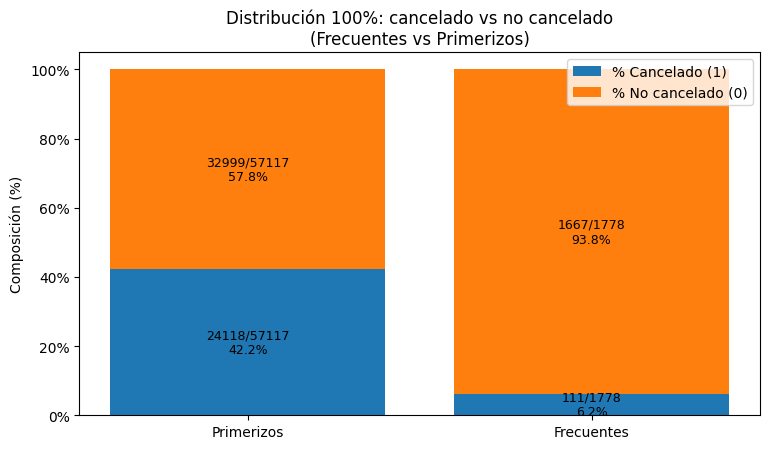

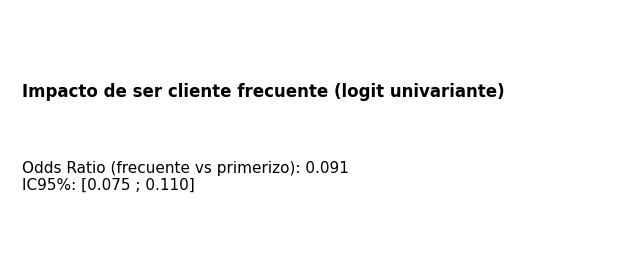

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import statsmodels.formula.api as smf
from statsmodels.stats.proportion import proportion_confint

# --- Utilidad: normalizar columnas y calcular resumen auditables
def _coerce_binary_cancel(s):
    s = pd.to_numeric(s, errors="coerce").fillna(0)
    return (s > 0).astype(int)

def _coerce_binary_repeated(x):
    if pd.isna(x): return np.nan
    if isinstance(x, (int, np.integer, float, np.floating)): return int(x != 0)
    if isinstance(x, bool): return int(x)
    s = str(x).strip().lower()
    return 1 if s in {"1","true","t","yes","y","si","sí"} else 0

def resumen_repeated(df: pd.DataFrame, col_rep="is_repeated_guest"):
    tmp = df[[col_rep, "is_canceled"]].copy()
    tmp["is_canceled"] = _coerce_binary_cancel(tmp["is_canceled"])
    tmp[col_rep] = tmp[col_rep].apply(_coerce_binary_repeated)
    tmp = tmp.dropna(subset=[col_rep])
    tmp[col_rep] = tmp[col_rep].astype(int)

    g = tmp.groupby(col_rep)["is_canceled"].agg(cancelados="sum", total="count").reset_index()
    g["pct_cancel"] = 100 * g["cancelados"] / g["total"]
    lo, hi = proportion_confint(g["cancelados"], g["total"], alpha=0.05, method="wilson")
    g["ci_low"] = lo * 100
    g["ci_high"] = hi * 100
    g["label"] = g[col_rep].map({0:"Primerizos", 1:"Frecuentes"})
    # Ordenar: mayor a menor % cancelación (normalmente: primerizos > frecuentes)
    g = g.sort_values("pct_cancel", ascending=False).reset_index(drop=True)
    return g, tmp

# --- Gráfico 1: % cancelación con IC95% + conteos "cancelados/total (= %)"
def plot_pct_cancel_repeated(df: pd.DataFrame, col_rep="is_repeated_guest"):
    g, _ = resumen_repeated(df, col_rep)
    plt.figure(figsize=(7.6,4.6))
    plt.bar(g["label"], g["pct_cancel"])
    # barras de error (IC95% Wilson) y etiquetas
    for i, (y, lo, hi, c, t) in enumerate(zip(g["pct_cancel"], g["ci_low"], g["ci_high"], g["cancelados"], g["total"])):
        plt.vlines(i, lo, hi)
        plt.plot([i-0.08, i+0.08], [lo, lo])
        plt.plot([i-0.08, i+0.08], [hi, hi])
        plt.text(i, y, f"{int(c)}/{int(t)} (= {y:.1f}%)", ha="center", va="bottom", fontsize=10)
        plt.text(i, 0, f"n={int(t)}", ha="center", va="bottom", fontsize=9, rotation=90)
    plt.gca().yaxis.set_major_formatter(PercentFormatter())
    plt.ylabel("% de cancelación")
    plt.title("Cancelación: clientes frecuentes vs. primerizos")
    plt.tight_layout()
    plt.show()

# --- Gráfico 2: apilado 100% (no cancelado vs cancelado) con conteos
def plot_100pct_stack_repeated(df: pd.DataFrame, col_rep="is_repeated_guest"):
    g, _ = resumen_repeated(df, col_rep)
    idx = np.arange(len(g))
    pct1 = g["pct_cancel"].values
    pct0 = 100 - pct1

    plt.figure(figsize=(7.8,4.6))
    plt.bar(idx, pct1, label="% Cancelado (1)")
    plt.bar(idx, pct0, bottom=pct1, label="% No cancelado (0)")
    for i, (p1, p0, c, t) in enumerate(zip(pct1, pct0, g["cancelados"], g["total"])):
        if p1 > 5:
            plt.text(i, p1/2, f"{int(c)}/{int(t)}\n{p1:.1f}%", ha="center", va="center", fontsize=9)
        else:
            plt.text(i, p1 + 1, f"{int(c)}/{int(t)} ({p1:.1f}%)", ha="center", va="bottom", fontsize=9)
        if p0 > 5:
            plt.text(i, p1 + p0/2, f"{int(t-c)}/{int(t)}\n{p0:.1f}%", ha="center", va="center", fontsize=9)
    plt.xticks(idx, g["label"])
    plt.gca().yaxis.set_major_formatter(PercentFormatter())
    plt.ylabel("Composición (%)")
    plt.title("Distribución 100%: cancelado vs no cancelado\n(Frecuentes vs Primerizos)")
    plt.legend()
    plt.tight_layout()
    plt.show()

# --- (Opcional) Card ejecutiva con OR del logit e IC95% ---
def card_or_repeated(df: pd.DataFrame, col_rep="is_repeated_guest"):
    _, tmp = resumen_repeated(df, col_rep)
    m = smf.logit("is_canceled ~ " + col_rep, data=tmp).fit(disp=False, maxiter=200)
    beta = m.params[col_rep]
    se   = m.bse[col_rep]
    orv  = float(np.exp(beta))
    ci   = (float(np.exp(beta - 1.96*se)), float(np.exp(beta + 1.96*se)))

    fig = plt.figure(figsize=(6.4,2.8))
    plt.text(0.02, 0.65, "Impacto de ser cliente frecuente (logit univariante)", fontsize=12, weight="bold")
    plt.text(0.02, 0.28, f"Odds Ratio (frecuente vs primerizo): {orv:.3f}\nIC95%: [{ci[0]:.3f} ; {ci[1]:.3f}]", fontsize=11)
    plt.axis("off")
    plt.tight_layout()
    plt.show()

# --- Cómo usarlos en tu notebook ---
plot_100pct_stack_repeated(data, "is_repeated_guest")
card_or_repeated(data, "is_repeated_guest")


Estimamos una regresión logística univariante con is_canceled como respuesta e is_repeated_guest como predictor. El coeficiente resultó negativo y de gran magnitud (β = −2.396; p ≈ 5.90×10⁻¹³¹), por lo que rechazamos H0 al 5% y concluimos que ser cliente frecuente sí influye en la cancelación: el odds ratio fue 0.091 (IC95%: 0.075–0.110), es decir, las odds de cancelar de un cliente frecuente son alrededor de un 91% menores que las de un primerizo. De forma consistente, las tasas empíricas muestran ≈6.2% de cancelaciones entre frecuentes (111/1,778) frente a ≈42.2% entre primerizos (24,118/57,117). Las pruebas de robustez también respaldan este hallazgo: χ²(1)=920.50, p≈3.44×10⁻²⁰² en la tabla 2×2, y prueba de dos proporciones z=−30.36, p≈1.63×10⁻²⁰². Aunque el pseudo-R² (0.0146) es modesto —lo habitual con un único predictor—, la evidencia estadística es contundente: los clientes frecuentes tienden a cancelar mucho menos que quienes reservan por primera vez.